In [123]:
import pandas as pd
import numpy as np

In [124]:
data=pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [126]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [127]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [128]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [129]:
data.shape

(545, 13)

In [130]:
X=data.drop(['price'],axis=1)
y=data['price']

In [131]:
X.shape,y.shape

((545, 12), (545,))

In [132]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [133]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
dtypes: int64(5), object(7)
memory usage: 51.2+ KB


In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in X.select_dtypes(include="object").columns.tolist():
    X[i] = le.fit_transform(X[i])
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   stories           545 non-null    int64
 4   mainroad          545 non-null    int64
 5   guestroom         545 non-null    int64
 6   basement          545 non-null    int64
 7   hotwaterheating   545 non-null    int64
 8   airconditioning   545 non-null    int64
 9   parking           545 non-null    int64
 10  prefarea          545 non-null    int64
 11  furnishingstatus  545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=2529)

In [138]:
print('X_train shape:',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape: (408, 12)
X_test shape : (137, 12)
y_train shape: (408,)
y_test shape : (137,)


In [139]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [140]:
var_to_stand=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus']

In [141]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train[var_to_stand]=ss.fit_transform(X_train[var_to_stand])
X_test[var_to_stand]=ss.transform(X_test[var_to_stand])

In [142]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error,r2_score

In [143]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [144]:
model1.fit(X_train,y_train)

LinearRegression()

In [145]:
model1.intercept_

4684475.490196078

In [146]:
model1.coef_

array([ 465545.81816323,   68298.48133976,  507175.72263353,
        357069.65870283,  137664.19185576,  126631.92382675,
        118189.13767619,  178514.92971112,  420164.22453979,
        218793.09577888,  256513.68160101, -184567.94546076])

In [147]:
y1_pred=model1.predict(X_test)

In [148]:
err1=mean_absolute_percentage_error(y_test,y1_pred)*100
print('mean_absolute_percentage_error:',err1)
print('mean_absolute_error:',mean_absolute_error(y_test,y1_pred))
print('mean_squared_error:',mean_squared_error(y_test,y1_pred))
r2_scr1=r2_score(y_test,y1_pred)
print('r2_score:',r2_scr1)

mean_absolute_percentage_error: 19.29109019440404
mean_absolute_error: 945334.1890352546
mean_squared_error: 1741899873538.0261
r2_score: 0.615096328976878


In [149]:
from sklearn.linear_model import Ridge
model2=Ridge()

In [150]:
model2.fit(X_train,y_train)

Ridge()

In [151]:
y2_pred=model2.predict(X_test)

In [152]:
err2=mean_absolute_percentage_error(y_test,y2_pred)*100
print('mean_absolute_percentage_error:',err2)
print('mean_absolute_error:',mean_absolute_error(y_test,y2_pred))
print('mean_squared_error:',mean_squared_error(y_test,y2_pred))
r2_scr2=r2_score(y_test,y2_pred)
print('r2_score:',r2_scr2)

mean_absolute_percentage_error: 19.29488730190715
mean_absolute_error: 945463.3838802001
mean_squared_error: 1742579724382.6753
r2_score: 0.614946103875063


In [153]:
from sklearn.linear_model import Lasso
model3=Lasso()

In [154]:
model3.fit(X_train,y_train)

Lasso()

In [155]:
y3_pred=model3.predict(X_test)

In [156]:
err3=mean_absolute_percentage_error(y_test,y3_pred)*100
print('mean_absolute_percentage_error:',err3)
print('mean_absolute_error:',mean_absolute_error(y_test,y3_pred))
print('mean_squared_error:',mean_squared_error(y_test,y3_pred))
r2_scr3=r2_score(y_test,y3_pred)
print('r2_score:',r2_scr3)

mean_absolute_percentage_error: 19.291097966918805
mean_absolute_error: 945334.4945943741
mean_squared_error: 1741901057309.9712
r2_score: 0.6150960674014716


In [157]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()

In [158]:
model4.fit(X_train,y_train)

RandomForestRegressor()

In [159]:
y4_pred=model4.predict(X_test)

In [160]:
err4=mean_absolute_percentage_error(y_test,y4_pred)*100
print('mean_absolute_percentage_error:',err4)
print('mean_absolute_error:',mean_absolute_error(y_test,y4_pred))
print('mean_squared_error:',mean_squared_error(y_test,y4_pred))
r2_scr4=r2_score(y_test,y4_pred)
print('r2_score:',r2_scr4)

mean_absolute_percentage_error: 20.698041345616936
mean_absolute_error: 999326.5486618007
mean_squared_error: 1997512218042.9456
r2_score: 0.5586142479724541


In [161]:
from sklearn.neighbors import KNeighborsRegressor
model5=KNeighborsRegressor()

In [162]:
model5.fit(X_train,y_train)

KNeighborsRegressor()

In [163]:
y5_pred=model5.predict(X_test)

In [164]:
err5=mean_absolute_percentage_error(y_test,y5_pred)*100
print('mean_absolute_percentage_error:',err5)
print('mean_absolute_error:',mean_absolute_error(y_test,y5_pred))
print('mean_squared_error:',mean_squared_error(y_test,y5_pred))
r2_scr5=r2_score(y_test,y5_pred)
print('r2_score:',r2_scr5)

mean_absolute_percentage_error: 19.89267339188119
mean_absolute_error: 995611.0218978102
mean_squared_error: 2133327454177.3723
r2_score: 0.5286034627584716


In [165]:
results=pd.DataFrame({
    'Models':['Linear Regression','Ridge','Lasso','Random Forest Regressor','K Neighbors Regressor'],
    'Mean_abs_error':[err1,err2,err3,err4,err5],
    'r2_score':[r2_scr1,r2_scr2,r2_scr3,r2_scr4,r2_scr5]}).sort_values(by='Mean_abs_error',ascending=True)
results

,Models,Mean_abs_error,r2_score
0,Linear Regression,19.291090,0.615096
2,Lasso,19.291098,0.615096
1,Ridge,19.294887,0.614946
4,K Neighbors Regressor,19.892673,0.528603
3,Random Forest Regressor,20.698041,0.558614


<Axes: xlabel='Models'>

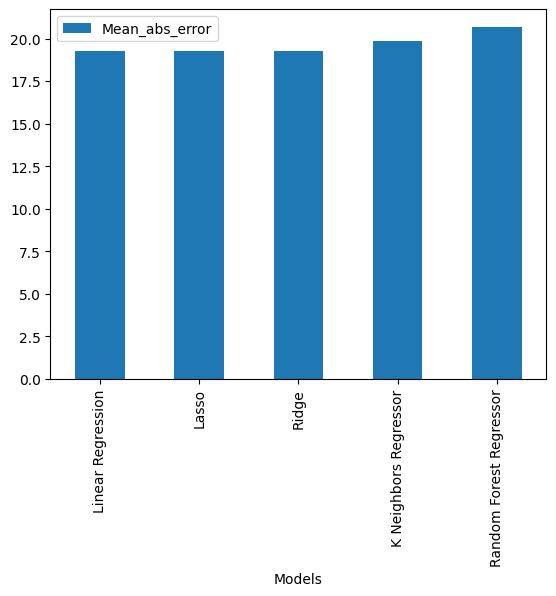

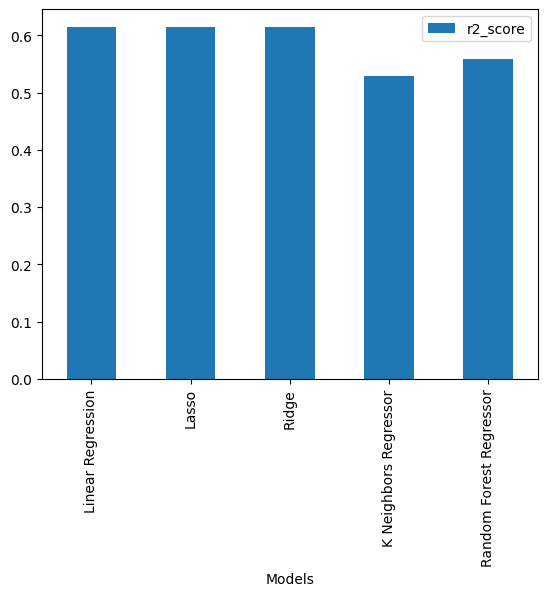

In [166]:
results.plot.bar(x='Models',y='Mean_abs_error')
results.plot.bar(x='Models',y='r2_score')